Momentum Trading Strategy implemented in Python on a 500 Stocks universe [Beginner friendly]
By AlgoVibes (Youtube)
https://www.youtube.com/watch?v=L2nhNvIAyBI

Description:<br>
Get list of S&P500 stocks<br>
Download price data for all<br>
Concatenate into one dataframe<br>
Calculate percent change<br>
Resample to monthly period<br>

In [1]:
#Import libraries
import sys
import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np
from pandas.tseries.offsets import MonthEnd
%matplotlib inline
import quantstats as qs
qs.extend_pandas() # # extend pandas functionality with metrics, etc.
sys.path.append('/home/lantro/Documents/Algo Trading/Stock Price DB')
#from get_ticker_data_from_db_v2 import process_ticker
from StockPriceData import process_ticker

In [2]:
#Set variables 
data_folder = '/home/lantro/Documents/Algo Trading/Data'
start_date = '1962-01-02'
end_date = '2022-08-23'
get_latest_data = True # Getting latest prices from DB is slow, so we can read previously created csv
tickers = ['AAPL','AMZN','NFLX','AMD','NVDA','MSFT','GOOGL','GM','WMT','IBM','KO']
benchmark = ['^GSPC']


In [3]:
#NOTE: when we get price df, we may want to replace all values below a certain threshold with 0 so that our algo doesn'tickers
# trade them since they may appear to have great returns at times even though they're uninvestible at the time such as when they first list.
# We should replace small values from beginning of df until the price meets our threshold. We probably want to leave in prices when they go below our threshold later.
def get_prices(tickers):
    if get_latest_data == True:
        prices, symbols = [],[]
        for ticker in tickers:
            print(f'Processing {ticker}')
            try:
                df = process_ticker(ticker,end_date)['Adj_Close']
                if not df.empty:
                    print(f'Appending {ticker} to prices and symbols lists')
                    prices.append(df)
                    symbols.append(ticker)
            except:
                print(f'Unable to download data for {ticker}')
            
        all_prices = pd.concat(prices,axis=1) #Concatenate all ticker price dfs to one df
        all_prices.columns = symbols # Rename column names based on tickers
        all_prices.to_csv(f"{data_folder}/all_sp500_prices.csv", index=True) #Index is date
    else:
        #all_prices = pd.read_csv(f"{data_folder}/all_sp500_prices.csv", index_col=[0], header=0, parse_dates=True) #Index is date
        all_prices = pd.read_csv(f"{data_folder}/all_sp500_prices.csv", index_col='Date', parse_dates=True)
        #all_prices.index = pd.to_datetime(all_prices.index) #Not necessary if dates are parsed properly
    return(all_prices)

all_prices = get_prices(tickers)
benchmark_prices = get_prices(benchmark)

Processing AAPL
Connecting to DB on rpi4.
Latest price data for AAPL (2022-10-07) >= required end date (2022-08-23).
Appending AAPL to prices and symbols lists
Processing AMZN
Connecting to DB on rpi4.
Latest price data for AMZN (2022-10-07) >= required end date (2022-08-23).
Appending AMZN to prices and symbols lists
Processing NFLX
Connecting to DB on rpi4.
Latest price data for NFLX (2022-09-30) >= required end date (2022-08-23).
Appending NFLX to prices and symbols lists
Processing AMD
Connecting to DB on rpi4.
Latest price data for AMD (2022-10-07) >= required end date (2022-08-23).
Appending AMD to prices and symbols lists
Processing NVDA
Connecting to DB on rpi4.
Latest price data for NVDA (2022-09-30) >= required end date (2022-08-23).
Appending NVDA to prices and symbols lists
Processing MSFT
Connecting to DB on rpi4.
Latest price data for MSFT (2022-09-30) >= required end date (2022-08-23).
Appending MSFT to prices and symbols lists
Processing GOOGL
Connecting to DB on rpi4.


In [4]:
benchmark_prices.head()

,^GSPC
Date,
1950-01-03,16.66
1950-01-04,16.85
1950-01-05,16.93
1950-01-06,16.98
1950-01-09,17.08


In [5]:
#prices
#symbols
#all_prices.index
all_prices.tail()

,AAPL,AMZN,NFLX,AMD,NVDA,MSFT,GOOGL,GM,WMT,IBM,KO
Date,,,,,,,,,,,
2022-10-03,142.45,115.88,NaN,66.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-04,146.10,121.09,NaN,67.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-05,146.40,120.95,NaN,67.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-06,145.43,120.30,NaN,67.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-07,140.09,114.56,NaN,58.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Calculate monthly returns
if get_latest_data == True:
    all_mtl_ret = all_prices.pct_change().resample('M').agg(lambda x : (x + 1).prod() -1)
    all_mtl_ret.to_csv(f"{data_folder}/all_mtl_ret.csv", index=True) #Index is date
else:
    all_mtl_ret = pd.read_csv(f"{data_folder}/all_mtl_ret.csv", index_col='Date', parse_dates=True) #Index is date
# IMPORTANT: We need to remove NaN and inf values from percentage returns df since stocks that trade at very low prices or zero will have
# crazy return calculations when prices go from 0 to anything or vice versa.
all_mtl_ret = all_mtl_ret.replace([np.inf, -np.inf, np.nan], 0)
#Create a new prices df of only companies that have prices going back to the earliest date
#earliest_prices = all_prices.loc[:, all_prices.iloc[0] > 0]


In [7]:
all_mtl_ret.index
all_mtl_ret.tail()

,AAPL,AMZN,NFLX,AMD,NVDA,MSFT,GOOGL,GM,WMT,IBM,KO
Date,,,,,,,,,,,
2022-06-30,-0.081430,-0.955823,-0.114313,-0.249264,-0.188143,-0.055321,-0.042185,-0.178904,-0.054808,0.016926,-0.007416
2022-07-31,0.188634,0.270596,0.286098,0.235386,0.198166,0.093097,-0.946624,0.141688,0.086116,-0.073660,0.020029
2022-08-31,-0.032552,-0.060615,-0.005958,-0.101620,-0.168970,-0.068640,-0.069635,0.053778,0.003786,-0.017891,-0.038336
2022-09-30,-0.120977,-0.108622,0.053140,-0.253446,-0.195773,-0.109267,-0.116152,-0.160167,-0.021501,-0.075049,-0.092205
2022-10-31,0.013676,0.013805,0.000000,-0.077652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
benchmark_returns = benchmark_prices.pct_change().dropna()
benchmark_monthly_returns = benchmark_prices.pct_change().resample('M').agg(lambda x : (x + 1).prod() -1)

In [9]:
benchmark_returns.head()
benchmark_monthly_returns.head()

,^GSPC
Date,
1950-01-31,0.023409
1950-02-28,0.009971
1950-03-31,0.004065
1950-04-30,0.038751
1950-05-31,0.045657


Put it all together into a function that takes a lookback period (instead of just 12 months)

In [10]:
def mom_long(all_mtl_ret, lookback):
    #Calculate rolling returns based on provided lookback period and return df
    #Loop though rolling return df and identify 50 winning stocks
    #Get return for following month for each winning stock
    #Append returns to list
    #Return the return for the series of returns 
    all_mtl_ret_lb = all_mtl_ret.rolling(lookback).agg(lambda x: (x+1).prod() - 1) #Calculate return for period
    #See https://stackoverflow.com/questions/67168187/cannot-called-a-function-using-agg-method-in-pandas
    all_mtl_ret_lb.dropna(inplace=True)
    rets = {}
    for row in range(len(all_mtl_ret_lb)-1): #Loop through all monthly periods & identify winners and losers
        curr = all_mtl_ret_lb.iloc[row]
        win = curr.nlargest(2)
        win_ret = all_mtl_ret.loc[win.name + MonthEnd(1), win.index]
        win_mean = win_ret.mean() #Average return of top stocks
        rets[curr.name]=win_mean
    #print(f'rets: {rets}')
    ret_series = pd.Series(rets, dtype='float64')
    # Use QS to calculate strategy stats here or just return the return series and do it later.
    tot_ret = round(qs.stats.comp(ret_series),2)
    sharpe_ratio = round(qs.stats.sharpe(ret_series),2)
    max_dd = round(qs.stats.max_drawdown(ret_series),2)
    print(f'Lookback:  {lookback},  Tot Ret: {tot_ret},  Sharpe Ratio:  {sharpe_ratio},  Max DD:  {max_dd}')
    # Calculate returns manually for comparison
    tot_return = (pd.Series(rets, dtype='float64') + 1).prod() - 1
    cum_returns = (ret_series + 1).cumprod()
    #print(f'Tot Cum Return:  {round((cum_returns.iloc[-1])-1,2)}')
    return (ret_series)
    #Changes: return the return series, then analyze it in another function?


In [11]:
# Calculate momentum results for several different lookback periods
monthly_periods = None#120 # Specify "None" if you don't want to roll over the entire dataset

# Improvement:  keep track of lookback period return series by adding to a dictionary, then we can reference later
# to compare different weightings for top x lookback periods. This will allow us to try compare returns for different weightings.
# (period 1 return * weight) + (period 2 return * wieght), etc
'''You can compute a weighted average by multiplying its relative proportion or percentage by its value in sequence and
 adding those sums together. Thus, if a portfolio is made up of 55% stocks, 40% bonds, and 5% cash, those weights would be
  multiplied by their annual performance to get a weighted average return.'''

#all_mtl_ret_limited = all_mtl_ret.loc['2000-09-01':].copy()
all_mtl_ret_limited = all_mtl_ret.iloc[:monthly_periods,:]#.copy()
print(f'Returns for {len(all_mtl_ret_limited)} months ({all_mtl_ret_limited.index[0].date()} - {all_mtl_ret_limited.index[-1].date()})')
for lookback in range(1,13):
    returns = mom_long(all_mtl_ret_limited, lookback)
    #print(f'Lookback: {lookback} \tTotal Return: {round(tot_ret,2)}')
    #print(mom(all_mtl_ret.iloc[50:75,20:30], lookback)) #Limit return df sent to momentum function for testing

Returns for 730 months (1962-01-31 - 2022-10-31)
Lookback:  1,  Tot Ret: 98829.92,  Sharpe Ratio:  3.65,  Max DD:  -0.58
Lookback:  2,  Tot Ret: 238480.93,  Sharpe Ratio:  3.57,  Max DD:  -0.69
Lookback:  3,  Tot Ret: 2059163.82,  Sharpe Ratio:  4.11,  Max DD:  -0.63
Lookback:  4,  Tot Ret: 526562.33,  Sharpe Ratio:  3.8,  Max DD:  -0.56
Lookback:  5,  Tot Ret: 986101.55,  Sharpe Ratio:  4.07,  Max DD:  -0.6
Lookback:  6,  Tot Ret: 451567.41,  Sharpe Ratio:  3.79,  Max DD:  -0.7
Lookback:  7,  Tot Ret: 529969.21,  Sharpe Ratio:  3.88,  Max DD:  -0.68
Lookback:  8,  Tot Ret: 626385.26,  Sharpe Ratio:  3.83,  Max DD:  -0.67
Lookback:  9,  Tot Ret: 391322.46,  Sharpe Ratio:  3.73,  Max DD:  -0.79
Lookback:  10,  Tot Ret: 736679.33,  Sharpe Ratio:  3.92,  Max DD:  -0.73
Lookback:  11,  Tot Ret: 1251917.49,  Sharpe Ratio:  4.05,  Max DD:  -0.6
Lookback:  12,  Tot Ret: 2622070.61,  Sharpe Ratio:  4.19,  Max DD:  -0.65


In [12]:
returns = mom_long(all_mtl_ret_limited, 6) #Get return series for best lookback value
# basic metrics. (benchmark can be a pandas Series or ticker)
returns.head()

Lookback:  6,  Tot Ret: 451567.41,  Sharpe Ratio:  3.79,  Max DD:  -0.7


1962-06-30    0.0
1962-07-31    0.0
1962-08-31    0.0
1962-09-30    0.0
1962-10-31    0.0
dtype: float64

In [13]:
# Pass returns and benchmark to QuantStats to get return metrics
#qs.reports.metrics(returns, '^GSPC', mode='basic')
qs.reports.metrics(returns, benchmark_monthly_returns, mode='basic')

                    Strategy        Benchmark
------------------  --------------  -----------
Start Period        1962-06-30      1962-06-30
End Period          2022-09-30      2022-09-30
Risk-Free Rate      0.0%            0.0%
Time in Market      92.0%           100.0%

Cumulative Return   45,156,740.90%  6,449.08%
CAGR﹪              24.1%           7.18%

Sharpe              3.79            2.48
Prob. Sharpe Ratio  100.0%          100.0%
Sortino             7.39            3.73
Sortino/√2          5.23            2.64
Omega               2.1             2.1

Max Drawdown        -70.1%          -52.56%
Longest DD Days     1950            2738

Gain/Pain Ratio     1.1             0.51
Gain/Pain (1M)      1.1             0.51

Payoff Ratio        1.36            1.2
Profit Factor       2.1             1.51
Common Sense Ratio  3.43            1.61
CPC Index           1.65            1.08
Tail Ratio          1.64            1.07
Outlier Win Ratio   2.97            6.18
Outlier Loss Ratio

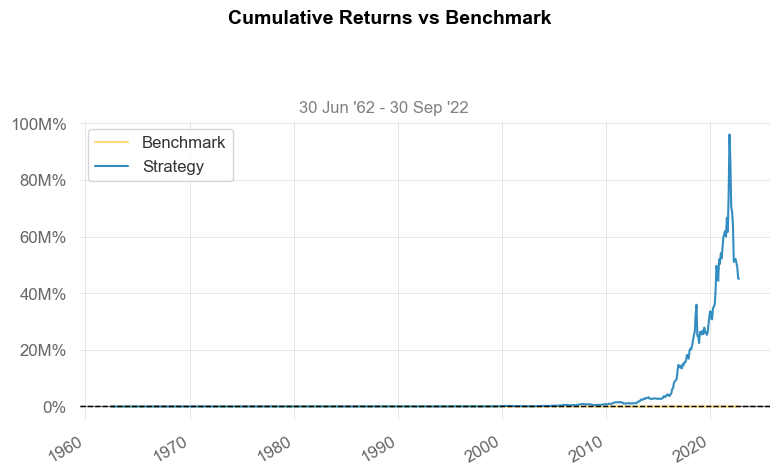

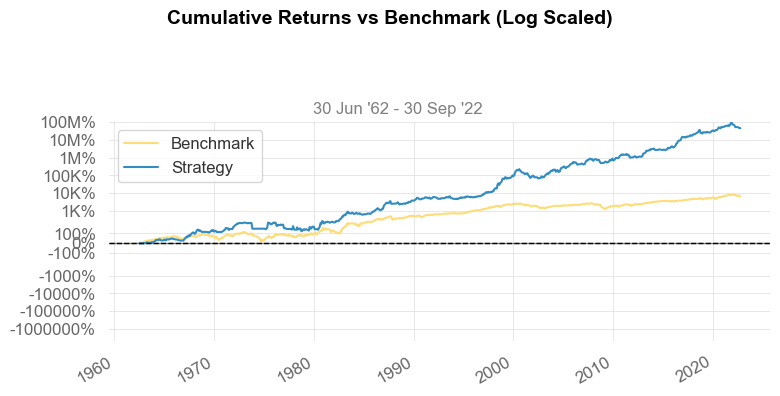

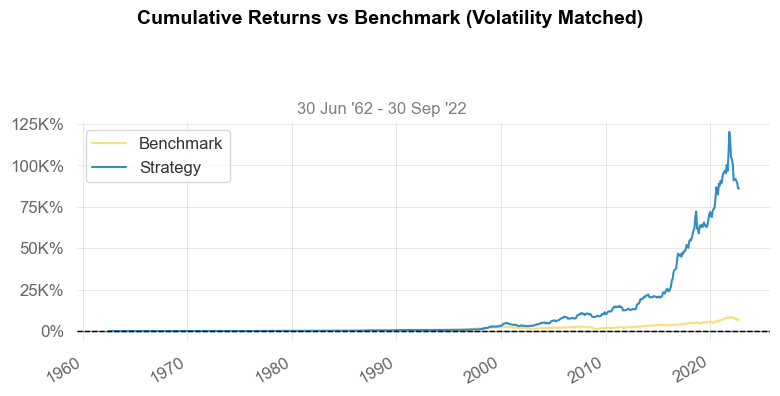

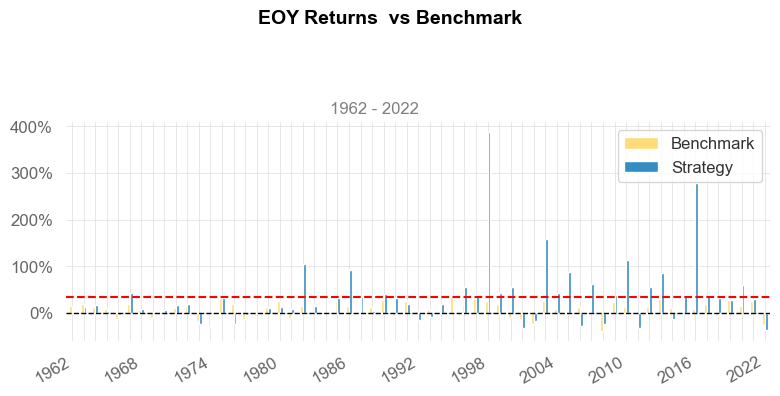

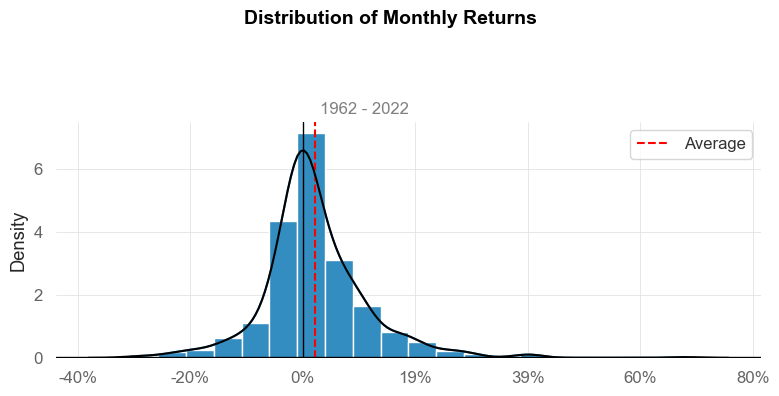

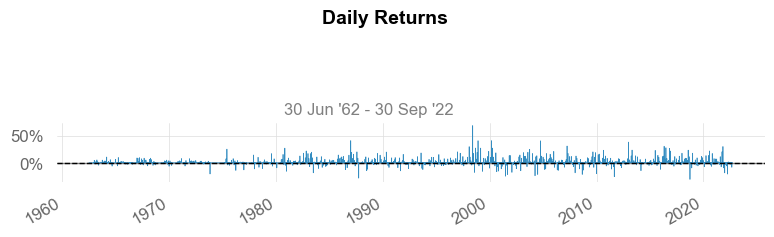

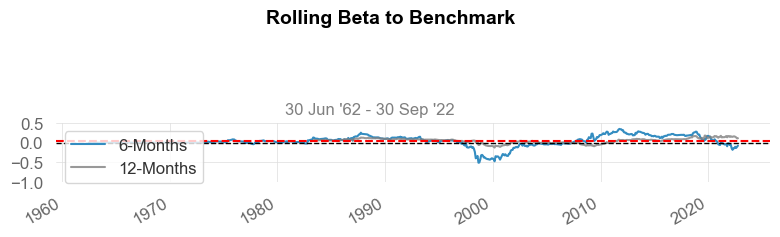

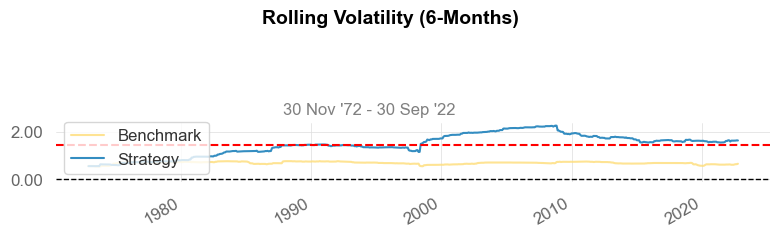

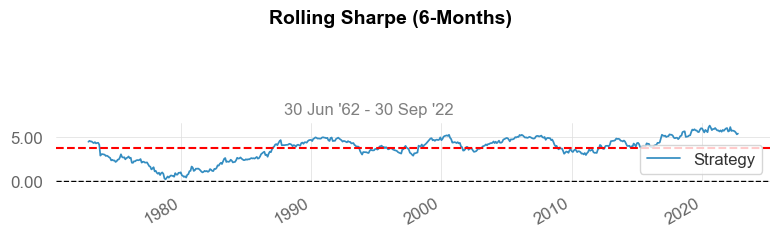

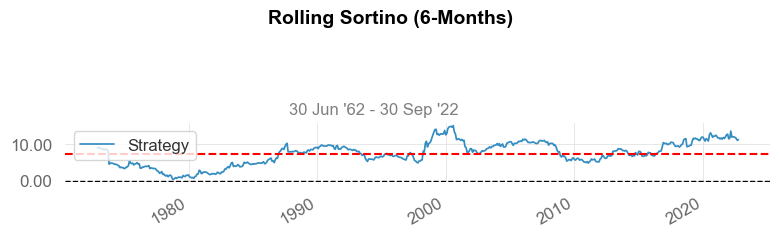

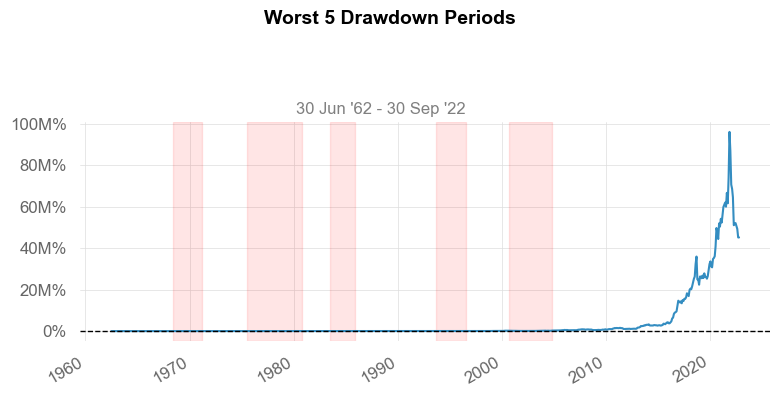

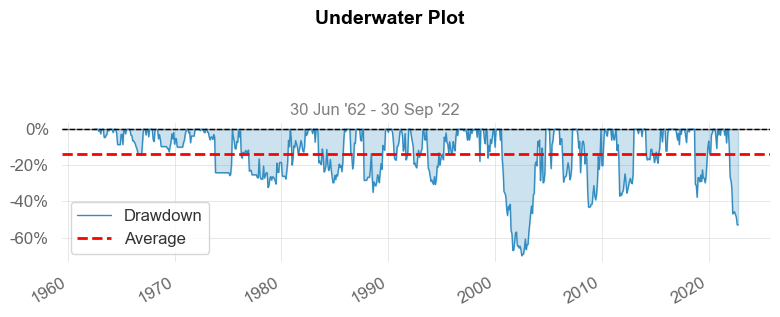

/home/lantro/algo/lib/python3.10/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


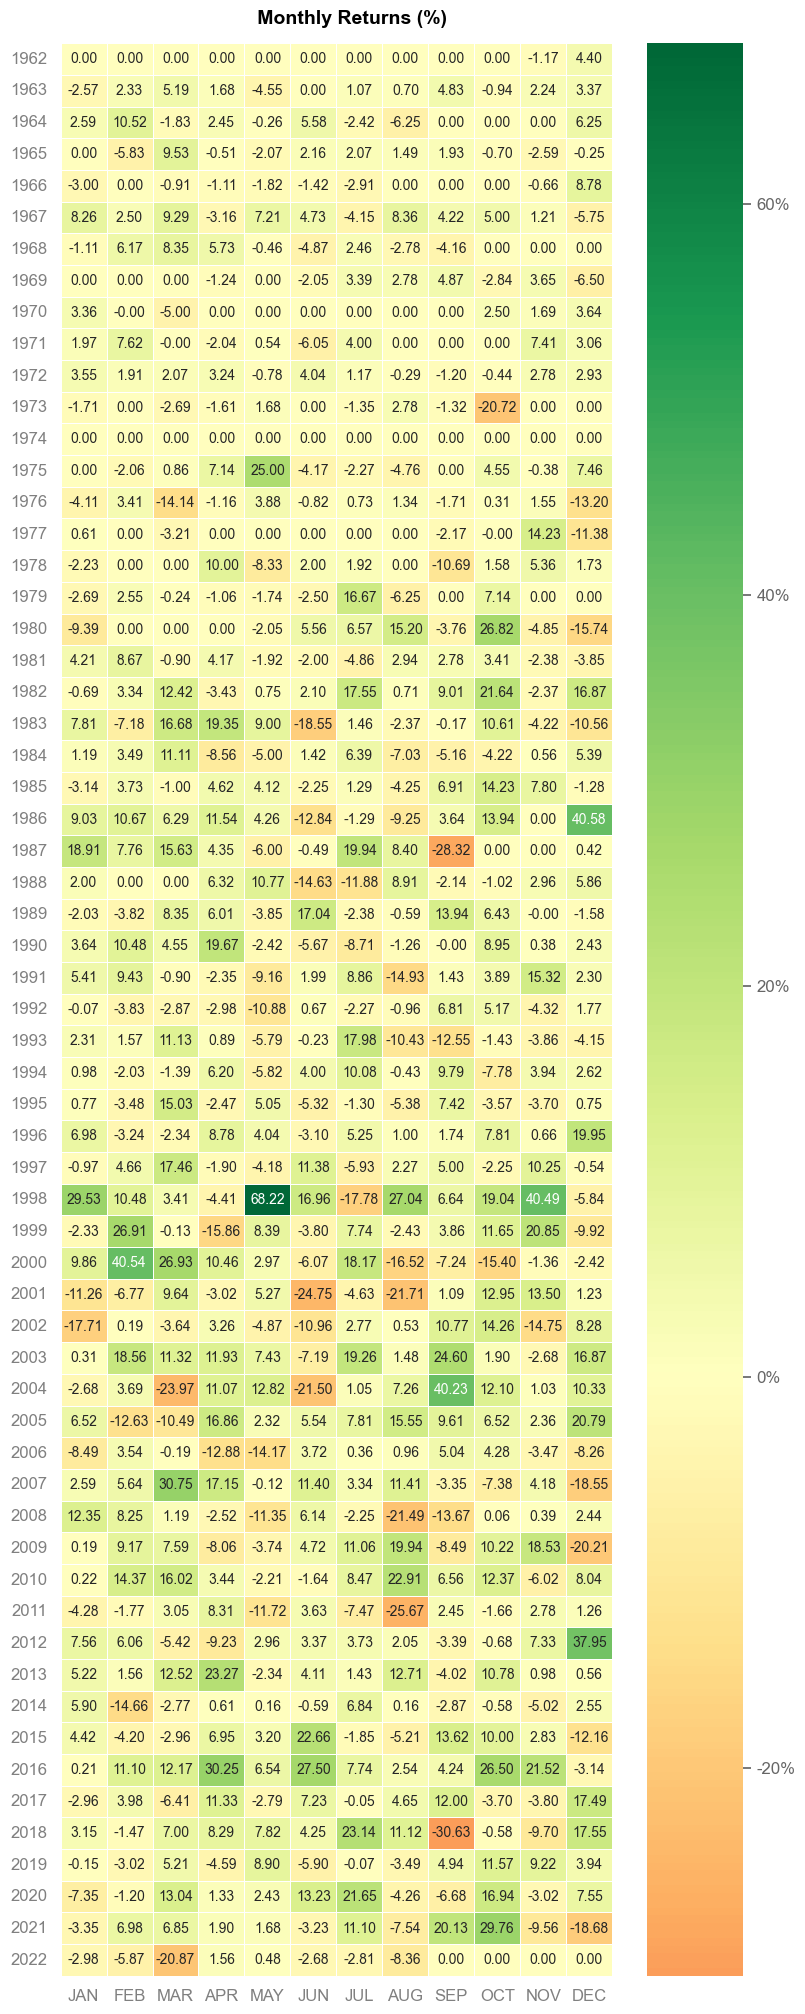

/home/lantro/algo/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


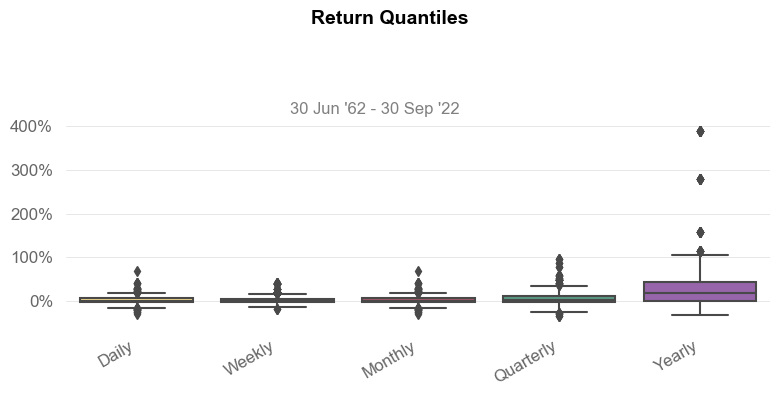

In [14]:
qs.reports.plots(returns, benchmark_monthly_returns, mode='full')